In [8]:
import sys
sys.path.append('../src/')
import thumbstack
from thumbstack import *
from my_functions import cutting, mapping, masking, binning
import numpy as np
from pixell import enmap
import mass_conversion
from mass_conversion import *
import matplotlib.pyplot as plt

In [ ]:
#this_map=mapping('act_dr5.01_s08s18_AA_f150_night_map.fits.txt', save=True, save_name='act_test2_map')
#this_mask=masking('act_dr5.01_s08s18_AA_f150_night_map.fits.txt', 'gal60_mask.fits', save=True, save_name='act_test2_mask')

#my_dict={'LOGM': [6,9], 'LOGSFR': [-10,0]}
#my_dict={'LOGM': [6,6.5], 'LOGSFR': [-1.5,0]}
my_data='FujiBGSPhysProp_v1.1'

mapped = enmap.read_map('act_test2_map')
masked = enmap.read_map('act_test2_mask')
my_dict={'LOGM': [6,6.5], 'LOGSFR': [-1.5,0]}
my_data='FujiBGSPhysProp_v1.1'

ts = ThumbStack(cutting(my_data, my_dict), 
                mapped, 
                masked, 
                name='act_test4',
                nameLong=None, 
                save=True, 
                nProc=32,
                filterType='ringring2',
                #doMBins=False, 
                doBootstrap=True,
                # doStackedMap=True,
                #doVShuffle=False, 
                #cmbNu=cmap.nu, 
                #cmbUnitLatex=cmap.unitLatex,
                pathOut='') #pathOut goes to my ThumbStack directory

In [ ]:
def stacked_plot(catalog_name, cmb_map, mask, n_bins, gal_property, name):
    
    # run binning
    boundaries = binning(catalog_name, n_bins, gal_property, tabled=True)

    # run thumbstack with 
    for i in range(n_bins):
        outName = name + '_bin' + str(i+1)
        this_min = gal_property + '_min'
        this_max = gal_property + '_max'
        prop_dict = {} # clears dictionary from prev loop
        prop_dict = {gal_property: [boundaries[this_min][i], boundaries[this_max][i]}

        ThumbStack(cutting(catalog_name, prop_dict), 
                   cmb_map, 
                   mask, 
                   name=outName,
                   nameLong=None, 
                   save=True, 
                   nProc=32,
                   filterTypes='ringring2',
                   #doMBins=False, 
                   doBootstrap=True,
                   # doStackedMap=True,
                   #doVShuffle=False, 
                   #cmbNu=cmap.nu, 
                   #cmbUnitLatex=cmap.unitLatex,
                   pathOut='')
    
    # plotting
    plt.figure()
    for i in range(n_bins):
        fits_name = 'figures/thumbstack/' + name + '_bin' + str(i+1) + '/diskring_tsz_uniformweight.fits'
        fits_file = Table.read(fits_name, format='fits')
        cap_name = 'bin ' + str(i)
        plt.errorbar(fits_file['R'], fits_file['T'], yerr = fits_file['error'], alpha=0.4, label=cap_name)
    
    plt.xlabel(r'$R$ [arcmin]')
    plt.ylabel(r'$T$ [$\mu K\cdot\mathrm{arcmin}^2$]')
    plt.legend()
    
    fig_name=name+'_profile.png'
    plt.savefig(fig_name)
    
    plt.show()
    
    return

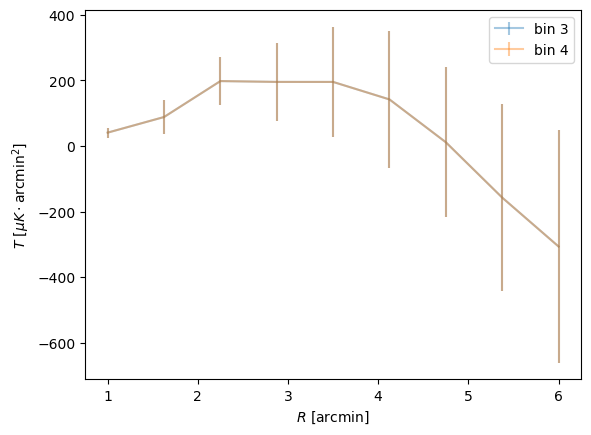

In [17]:
# ex plot
name = 'act_test'
plt.figure()
for i in range(3,5):
    fits_name = 'figures/thumbstack/' + name + str(i) + '/diskring_tsz_uniformweight.fits'
    fits_file = Table.read(fits_name, format='fits')
    cap_name = 'bin ' + str(i)
    plt.errorbar(fits_file['R'], fits_file['T'], yerr = fits_file['error'], alpha=0.4, label=cap_name)

plt.xlabel(r'$R$ [arcmin]')
plt.ylabel(r'$T$ [$\mu K\cdot\mathrm{arcmin}^2$]')
plt.legend()

fig_name=name+'_profile.png'
plt.savefig(fig_name)

plt.show()